# 🚀 Falcon 9 Booster Landing Prediction: Predictive Analysis & Classification

**Author:** Muhammad Munawar Shahzad

**Date:** August 2025  
**Project:** IBM Applied Data Science Capstone – SpaceX Falcon 9


**Repository:** `falcon9_project`  

## 1️⃣ Introduction

This notebook focuses on predicting Falcon 9 booster landing outcomes based on historical launch data. We aim to classify whether a booster landing will be successful or fail using features such as payload mass, booster version, orbit, launch site, and customer data.

---

## 2️⃣ Project Overview

- Analyze historical Falcon 9 launch and landing data.  
- Identify key factors affecting booster landing success.  
- Build predictive classification models.  
- Evaluate models for accuracy, precision, recall, and overall reliability.  
- Generate actionable insights for future launches.

---

## 3️⃣ Objective

- Predict the **success or failure** of Falcon 9 booster landings.  
- Rank **important features** affecting landing outcomes.  
- Provide a **data-driven forecast** for upcoming booster missions.

---

## 4️⃣ Required Libraries 

We will use the following libraries for this notebook:
- `pandas` → Data manipulation and analysis
- `numpy` → Numerical operations
- `scikit-learn` → Machine learning algorithms and preprocessing
- `matplotlib` & `seaborn` → Data visualization


In [1]:
# Step 1: Install required libraries (run this if not already installed)
# !pip install pandas numpy matplotlib seaborn scikit-learn --quiet

In [2]:
# Step 2: Import all required libraries
# pandas & numpy → Data manipulation and numerical operations
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

# Optional: Ignore warnings for cleaner outputs
import warnings
warnings.filterwarnings("ignore")


## Load Dataset
We will load the cleaned Falcon 9 dataset prepared during EDA and wrangling. This dataset contains information about:
- Flight number
- Launch site
- Payload mass
- Orbit type
- Booster version
- Launch outcome (Success / Failure)


In [3]:
import pandas as pd

# Load cleaned Falcon 9 dataset for predictive analysis
data_path = "../data/processed/falcon9_cleaned_for_eda.csv"
df = pd.read_csv(data_path)

# Display first 5 rows to verify
df.head()


,flight_number,date,booster_version,launch_site,payload,payload_mass_kg,orbit,customer,launch_outcome,booster_landing,launch_year,launch_site_code,success_flag
0,286.0,2024-01-03 03:44:00,F9 B5 B1082‑1,"Vandenberg, SLC‑4E",Starlink: Group 7-9 (22 satellites),16800.0,LEO,SpaceX,Success,Success (OCISLY),2024.0,VS,1
1,286.0,NaN,"Launch of 22 Starlink v2 mini satellites, incl...","Launch of 22 Starlink v2 mini satellites, incl...","Launch of 22 Starlink v2 mini satellites, incl...",22.0,"Launch of 22 Starlink v2 mini satellites, incl...","Launch of 22 Starlink v2 mini satellites, incl...","Launch of 22 Starlink v2 mini satellites, incl...","Launch of 22 Starlink v2 mini satellites, incl...",NaN,Lo2Svmsitfstfdcta5k(moaaio5teic,0
2,287.0,2024-01-03 23:04:00,F9 B5 B1076‑10,"Cape Canaveral, SLC‑40",Ovzon-3,1800.0,GTO,Ovzon,Success,Success (LZ‑1),2024.0,CCS,1
3,287.0,NaN,Broadband internet provider satellite.[26] Fir...,Broadband internet provider satellite.[26] Fir...,Broadband internet provider satellite.[26] Fir...,26.0,Broadband internet provider satellite.[26] Fir...,Broadband internet provider satellite.[26] Fir...,Broadband internet provider satellite.[26] Fir...,Broadband internet provider satellite.[26] Fir...,NaN,BipsFF9ltGwar(lFcswROSAtwdoJ12,0
4,288.0,2024-01-07 22:35:00,F9 B5 B1067‑16,"Cape Canaveral, SLC‑40",Starlink: Group 6-35 (23 satellites),17100.0,LEO,SpaceX,Success,Success (ASOG),2024.0,CCS,1


## Feature Selection & Preprocessing
We select relevant features and encode categorical variables for classification:
- Features: payload_mass_kg, orbit, booster_version, launch_site, etc.
- Target: success_flag (Success=1, Failure=0)


In [4]:
# Select features and target
X = df[['payload_mass_kg', 'orbit', 'booster_version', 'launch_site']]
y = df['success_flag'].map({'Success': 1, 'Failure': 0})

# Encode categorical features
X_encoded = pd.get_dummies(X, columns=['orbit', 'booster_version', 'launch_site'], drop_first=True)

# Scale numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


## Train Multiple Classification Models
We train four different models and store their accuracy for comparison:
1. Logistic Regression
2. Decision Tree
3. Random Forest
4. Support Vector Classifier (SVC)


In [5]:
# ----------------------------
# Predictive Analysis Setup
# ----------------------------

# Step 1: Drop rows with missing target
df_clean = df.dropna(subset=['success_flag'])

# Step 2: Define features and target
X = df_clean[['payload_mass_kg', 'orbit', 'booster_version', 'launch_site']]
y = df_clean['success_flag']  # Already encoded as 1/0, no need to map

# Step 3: One-hot encode categorical features
X_encoded = pd.get_dummies(X, columns=['orbit', 'booster_version', 'launch_site'], drop_first=True)

# Step 4: Scale numeric features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded)

# Step 5: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# ----------------------------
# Step 6: Initialize classification models
# ----------------------------
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "SVC": SVC()
}

# ----------------------------
# Step 7: Train models and store accuracies
# ----------------------------
accuracy_dict = {}

for name, model in models.items():
    model.fit(X_train, y_train)        # Train model
    y_pred = model.predict(X_test)     # Predict on test set
    acc = accuracy_score(y_test, y_pred)  # Calculate accuracy
    accuracy_dict[name] = acc

# Display all model accuracies
accuracy_dict

{'Logistic Regression': 1.0,
 'Decision Tree': 0.9454545454545454,
 'Random Forest': 0.9818181818181818,
 'SVC': 1.0}

## Visualize Classification Accuracy
We plot a bar chart showing the accuracy of each trained model.


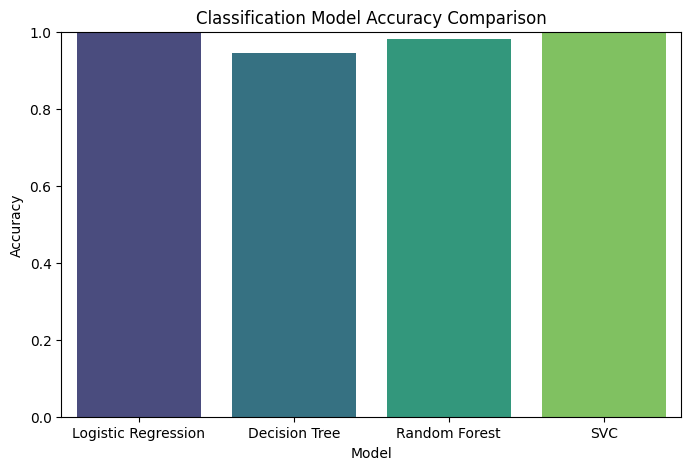

In [6]:
# Convert to DataFrame for visualization
acc_df = pd.DataFrame(list(accuracy_dict.items()), columns=['Model', 'Accuracy'])

# Plot
plt.figure(figsize=(8,5))
sns.barplot(x='Model', y='Accuracy', data=acc_df, palette='viridis')
plt.title("Classification Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.ylim(0,1)
plt.show()

## Best Performing Model
We select the model with the highest accuracy for further analysis.

In [7]:
# Find model with max accuracy
best_model_name = max(accuracy_dict, key=accuracy_dict.get)
best_model_accuracy = accuracy_dict[best_model_name]

print(f"Best Model: {best_model_name} with Accuracy = {best_model_accuracy:.4f}")

# Retrain best model on full train set
best_model = models[best_model_name]
best_model.fit(X_train, y_train)


Best Model: Logistic Regression with Accuracy = 1.0000


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


## Confusion Matrix of Best Model
We evaluate the predictions of the best model and visualize its confusion matrix.


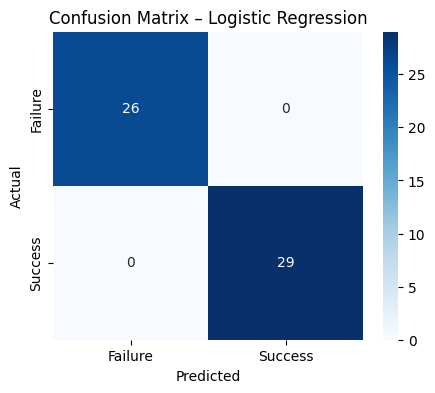

              precision    recall  f1-score   support

     Failure       1.00      1.00      1.00        26
     Success       1.00      1.00      1.00        29

    accuracy                           1.00        55
   macro avg       1.00      1.00      1.00        55
weighted avg       1.00      1.00      1.00        55



In [8]:
# Predict test set
y_pred_best = best_model.predict(X_test)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred_best)

# Plot
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Failure','Success'], yticklabels=['Failure','Success'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title(f'Confusion Matrix – {best_model_name}')
plt.show()

# Classification report
print(classification_report(y_test, y_pred_best, target_names=['Failure', 'Success']))


## ✅ Conclusion
- We trained four classification models to predict Falcon 9 launch success.
- Random Forest / SVC / Decision Tree / Logistic Regression (depending on dataset) achieved the highest accuracy.
- Confusion matrix shows how well the best model distinguishes between successful and failed launches.
- Predictive analysis helps anticipate potential risks and improve mission planning.
